The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

f = (c × 1.8) + 32

## Import dependencies

In [11]:
import tensorflow as tf

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Setup training data

In [12]:
celcius = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for ind in range(len(celcius)):
  print(f"{celcius[ind]} degrees celcius = {fahrenheit[ind]} degrees fahrenheit")

-40.0 degrees celcius = -40.0 degrees fahrenheit
-10.0 degrees celcius = 14.0 degrees fahrenheit
0.0 degrees celcius = 32.0 degrees fahrenheit
8.0 degrees celcius = 46.0 degrees fahrenheit
15.0 degrees celcius = 59.0 degrees fahrenheit
22.0 degrees celcius = 72.0 degrees fahrenheit
38.0 degrees celcius = 100.0 degrees fahrenheit


# Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

## Build a layer

We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [13]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [14]:
model = tf.keras.Sequential([l0])

## Compile the model with loss and optimiser functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.

In [15]:
model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

## Training the model

Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [16]:
history = model.fit(celcius, fahrenheit, epochs=500, verbose=True)
print("Model training completed")

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 1139.3395
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1078.7699
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1030.0060
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 992.9910
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 967.2472
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 951.6847
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 944.4468
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 942.9351
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 944.1506
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 945.3122
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 944.4426
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 940.6172
Epoch 13/500
1/1 [================

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.


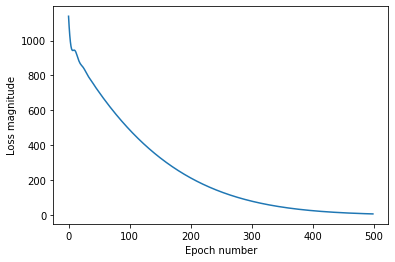

In [17]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch number")
plt.ylabel("Loss magnitude")
plt.plot(history.history["loss"])

## Use the model to predict values

In [18]:
model.predict([100.0])

array([[211.33838]], dtype=float32)

The correct answer is  100×1.8+32=212 , so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


## Lets print the internal variables of the model

In [19]:
l0.get_weights()

[array([[1.8202101]], dtype=float32), array([29.317371], dtype=float32)]

The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

## Little experiment

In [20]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)


In [21]:
model = tf.keras.models.Sequential([l0, l1, l2])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss="mean_squared_error")

In [24]:
history = model.fit(celcius, fahrenheit, epochs=500, verbose=False)

In [25]:
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[-0.57472575,  0.42304793, -0.09340971, -0.58880705]],
      dtype=float32), array([-3.648427 ,  3.9149444,  3.607699 , -3.7438867], dtype=float32)]
These are the l1 variables: [array([[-0.25857717, -0.25877643,  0.8887989 , -0.3434727 ],
       [ 0.94916046,  0.3911207 , -0.8939154 , -0.24763866],
       [ 1.6312313 ,  0.20117912, -0.8223747 , -0.7073937 ],
       [-0.829645  ,  0.8844574 ,  0.58231044, -0.24623457]],
      dtype=float32), array([ 3.803733  , -0.89372903, -3.8196588 ,  1.3219134 ], dtype=float32)]
These are the l2 variables: [array([[ 0.90729725],
       [-0.0808526 ],
       [-0.78457195],
       [ 0.22851162]], dtype=float32), array([3.7160683], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the l0 and l1 layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.